# Gaussian Naive Bayes

## Importing Necessary libraries

In [3]:
# For computations
import numpy as np
import pandas as pd

# For Visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

#For Ml computations
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## Reading the dataset

In [4]:
df = pd.read_csv("seattle-weather.csv")
df.head(5)
df.shape

(1461, 6)

In [17]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [5]:
df.isnull().any()

date             False
precipitation    False
temp_max         False
temp_min         False
wind             False
weather          False
dtype: bool

In [6]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


## Features of the dataset

In [7]:
features = ["precipitation", "temp_max", "temp_min", "wind"]

X = df[features]
y = df.iloc[:, 5]

In [8]:
#Displaying the top 5 rows
X.head(5)

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1


In [9]:
y

0       drizzle
1          rain
2          rain
3          rain
4          rain
         ...   
1456       rain
1457       rain
1458        fog
1459        sun
1460        sun
Name: weather, Length: 1461, dtype: object

## Splitting the data into traing and testing sets

 <ul>
    <li>70% for training of whole data</li>
    <li>30% for testing of whole data</li>
</ul>

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 0)

In [11]:
#Shapes of training and testing data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1022, 4), (1022,), (439, 4), (439,))

## Building the model - GaussianNB

In [12]:
naiveBayes = GaussianNB()
naiveBayes.fit(X_train, y_train)

GaussianNB()

## Making predictions

In [13]:
y_pred = naiveBayes.predict(X_test)
y_pred

array(['rain', 'sun', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain',
       'rain', 'rain', 'rain', 'sun', 'sun', 'rain', 'sun', 'sun', 'sun',
       'sun', 'sun', 'rain', 'rain', 'sun', 'sun', 'rain', 'rain', 'sun',
       'sun', 'sun', 'rain', 'sun', 'rain', 'rain', 'sun', 'sun', 'rain',
       'rain', 'rain', 'sun', 'sun', 'rain', 'sun', 'sun', 'rain', 'rain',
       'sun', 'sun', 'rain', 'sun', 'rain', 'snow', 'sun', 'rain', 'sun',
       'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun',
       'rain', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun',
       'sun', 'sun', 'sun', 'sun', 'rain', 'rain', 'sun', 'sun', 'sun',
       'sun', 'rain', 'rain', 'rain', 'sun', 'rain', 'sun', 'sun', 'sun',
       'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun',
       'rain', 'rain', 'sun', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun',
       'sun', 'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain',
       'sun', 'rain', 'sun', 'sun', 'sun', 'sun', 's

In [16]:
import joblib

# Save the trained model to a file
joblib.dump(naiveBayes, 'seattle_weather_naive_bayes.joblib')

['seattle_weather_naive_bayes.joblib']

## Accuracy Score

In [14]:
print("Training Score (accuracy): ", accuracy_score(y_train, naiveBayes.predict(X_train)))
print("Testing Score (accuracy): ", accuracy_score(y_test, y_pred))

Training Score (accuracy):  0.8542074363992173
Testing Score (accuracy):  0.8473804100227791


## Confusion Matrix

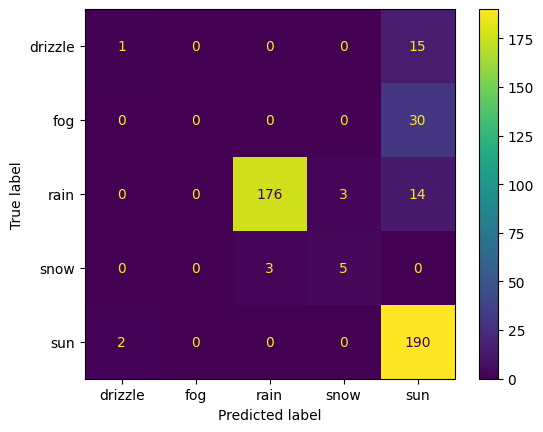

In [15]:
confusion = confusion_matrix(y_test, y_pred, labels = naiveBayes.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = naiveBayes.classes_)

display.plot()

### 15-Day Weather Prediction.

In [ ]:
from datetime import datetime, timedelta
from dotenv import load_dotenv
import os
import requests


model = joblib.load('seattle_weather_naive_bayes.joblib')

# Load environment variables
load_dotenv()
API_KEY = os.getenv("OPENWEATHER_API_KEY")
CITY = "Seattle"

def get_5_day_forecast():
    url = f"http://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric"
    response = requests.get(url)
    response.raise_for_status()  
    data = response.json()
    
    
    if 'list' not in data:   # Check if API returned valid data
        print("API Error:", data.get('message', 'Unknown error'))
        return pd.DataFrame()
    
    # Aggregate 3-hour intervals into daily averages
    daily_data = {}
    for entry in data['list']:
        date = datetime.fromtimestamp(entry['dt']).strftime('%Y-%m-%d')
        if date not in daily_data:
            daily_data[date] = {
                'precipitation': 0,
                'temp_max': -float('inf'),
                'temp_min': float('inf'),
                'wind': []
            }
        
        # Update precipitation (rain or snow)
        daily_data[date]['precipitation'] += entry.get('rain', {}).get('3h', 0)
        daily_data[date]['precipitation'] += entry.get('snow', {}).get('3h', 0)
        
        # Track max/min temperatures
        daily_data[date]['temp_max'] = max(daily_data[date]['temp_max'], entry['main']['temp_max'])
        daily_data[date]['temp_min'] = min(daily_data[date]['temp_min'], entry['main']['temp_min'])
        
        # Track wind speed
        daily_data[date]['wind'].append(entry['wind']['speed'])
    
    # Convert to DataFrame and calculate averages
    forecast = []
    for date, values in daily_data.items():
        forecast.append({
            'date': date,
            'precipitation': values['precipitation'],
            'temp_max': values['temp_max'],
            'temp_min': values['temp_min'],
            'wind': sum(values['wind']) / len(values['wind'])  # Daily average wind
        })
    
    return pd.DataFrame(forecast)

# Get forecast data
future_data = get_5_day_forecast()

if not future_data.empty:
    # Ensure column order matches training data
    X_future = future_data[["precipitation", "temp_max", "temp_min", "wind"]]
    
    # Predict weather
    future_data['predicted_weather'] = model.predict(X_future)
    
    # Results
    print(future_data[['date', 'predicted_weather']])
    
   
    future_data.to_csv('seattle_weather_forecast.csv', index=False)
else:
    print("Failed to fetch forecast data. Check API key or network connection.")

         date predicted_weather
0  2025-03-28              rain
1  2025-03-29              rain
2  2025-03-30              rain
3  2025-03-31              rain
4  2025-04-01              rain
5  2025-04-02              rain
